In [1]:
import pandas as pd
import numpy as np
import plotting as p
import matplotlib.pyplot as plt

In [2]:
# A_orig = pd.read_csv("datasets/originais/Dataset_PreProcessed_A.csv", parse_dates=[0])

In [3]:
A_orig.head()

,TimestampUTC,Watts
0,2012-04-30 00:00:00,0.0
1,2012-04-30 00:01:00,0.0
2,2012-04-30 00:02:00,0.0
3,2012-04-30 00:03:00,0.0
4,2012-04-30 00:04:00,0.0


In [141]:
A_orig = A_orig[['TimestampUTC', 'Watts']]

In [7]:
tdelta_mes = p.datetime.timedelta(days=30)
ultimodia = A_orig['TimestampUTC'].iloc[-1]
primeirodia = A_orig['TimestampUTC'].iloc[0]
diasfiltro = [primeirodia]
while primeirodia<=ultimodia:
    primeirodia+=tdelta_mes
    diasfiltro.append(primeirodia)
diasfiltro.append(ultimodia)

In [33]:
diasfiltro

[Timestamp('2012-04-30 09:16:03'),
 Timestamp('2012-05-30 09:16:03'),
 Timestamp('2012-06-29 09:16:03'),
 Timestamp('2012-07-29 09:16:03'),
 Timestamp('2012-08-28 09:16:03'),
 Timestamp('2012-07-31 09:15:31')]

In [8]:
Dia1_teste = A_orig[A_orig['TimestampUTC']<A_orig.loc[41800].TimestampUTC]
mes1 = A_orig[(A_orig['TimestampUTC']>=diasfiltro[0]) & (A_orig['TimestampUTC']<diasfiltro[1])]
mes2 = A_orig[(A_orig['TimestampUTC']>=diasfiltro[1]) & (A_orig['TimestampUTC']<diasfiltro[2])]
mes3 = A_orig[(A_orig['TimestampUTC']>=diasfiltro[2]) & (A_orig['TimestampUTC']<diasfiltro[3])]

In [12]:
Dia1_teste.set_index('TimestampUTC', inplace=True)

In [27]:
mes1

,TimestampUTC,Watts
0,2012-04-30 09:16:03,280.415
1,2012-04-30 09:16:08,279.209
2,2012-04-30 09:16:13,21.016
3,2012-04-30 09:16:15,284.964
4,2012-04-30 09:16:16,280.383
...,...,...
2133074,2012-05-30 00:56:48,4.814
2133075,2012-05-30 00:56:49,1.517
2133076,2012-05-30 00:56:51,4.325
2133077,2012-05-30 00:56:52,6.037


In [54]:
di = p.datetime.datetime(year=2012, month=4, day=30)
df = p.datetime.datetime(year=2012, month=7, day=31, hour=23, minute=59, second=59)
idx_dates_orig = pd.date_range(di, df, freq=p.datetime.timedelta(seconds=1))

In [77]:
tdelta_mes = p.datetime.timedelta(days=30)
ultimodia = A_orig_inputed['TimestampUTC'].iloc[-1]
primeirodia = A_orig_inputed['TimestampUTC'].iloc[0]
diasfiltro = []
while primeirodia<ultimodia:
    diasfiltro.append(primeirodia)
    primeirodia+=tdelta_mes
diasfiltro.append(ultimodia) 

In [78]:
diasfiltro

[Timestamp('2012-04-30 00:00:00'),
 Timestamp('2012-05-30 00:00:00'),
 Timestamp('2012-06-29 00:00:00'),
 Timestamp('2012-07-29 00:00:00'),
 Timestamp('2012-07-31 23:59:59')]

In [111]:
groupby_minutes = mes1.groupby(pd.PeriodIndex(data=mes1.index, freq=p.datetime.timedelta(minutes=1)))

In [113]:
results = groupby_minutes.sum()

In [115]:
results['Watts'].max()

550390.205

In [145]:
A_orig.set_index('TimestampUTC', inplace=True)

In [146]:
A_orig_groupby_minutes = A_orig.groupby(pd.PeriodIndex(data=A_orig.index, freq=p.datetime.timedelta(minutes=1)))
A_orig_minutes = A_orig_groupby_minutes.mean()

In [124]:
A_orig_minutes.tail()

,Watts
TimestampUTC,
2012-07-31 09:11,1023.205283
2012-07-31 09:12,1214.194589
2012-07-31 09:13,715.829174
2012-07-31 09:14,655.161864
2012-07-31 09:15,1021.731258


In [148]:
di = p.datetime.datetime(year=2012, month=4, day=30)
df = p.datetime.datetime(year=2012, month=7, day=31, hour=23, minute=59, second=59)
idx_dates_orig = pd.period_range(di, df, freq=p.datetime.timedelta(minutes=1))

In [150]:
idx_dates_orig

PeriodIndex(['2012-04-30 00:00', '2012-04-30 00:01', '2012-04-30 00:02',
             '2012-04-30 00:03', '2012-04-30 00:04', '2012-04-30 00:05',
             '2012-04-30 00:06', '2012-04-30 00:07', '2012-04-30 00:08',
             '2012-04-30 00:09',
             ...
             '2012-07-31 23:50', '2012-07-31 23:51', '2012-07-31 23:52',
             '2012-07-31 23:53', '2012-07-31 23:54', '2012-07-31 23:55',
             '2012-07-31 23:56', '2012-07-31 23:57', '2012-07-31 23:58',
             '2012-07-31 23:59'],
            dtype='period[T]', length=133920)

In [151]:
A_orig_inputed = A_orig_minutes.reindex(idx_dates_orig, fill_value=0)

In [155]:
A_orig_inputed.reset_index(inplace=True)
A_orig_inputed.rename(columns={'index':'TimestampUTC'}, inplace=True)

In [158]:
A_orig_inputed.to_csv("datasets/originais/A_orig_inputed.csv", index=False)

In [162]:
len(A_orig_inputed)/(24*60)

93.0

In [163]:
24*60

1440

In [161]:
A_orig_inputed[A_orig_inputed['Watts']>0]

,TimestampUTC,Watts
556,2012-04-30 09:16,247.027844
557,2012-04-30 09:17,214.662750
558,2012-04-30 09:18,247.871965
559,2012-04-30 09:19,314.757795
560,2012-04-30 09:20,248.162667
...,...,...
133031,2012-07-31 09:11,1023.205283
133032,2012-07-31 09:12,1214.194589
133033,2012-07-31 09:13,715.829174
133034,2012-07-31 09:14,655.161864


In [164]:
A = pd.read_csv("datasets/originais/A_orig_inputed.csv")

In [166]:
A['Watts'].max()

9867.8804

# Avaliação

## A

In [10]:
A_orig = pd.read_csv("datasets/originais/Dataset_PreProcessed_A.csv", parse_dates=[0])

In [12]:
# removendo valores nulos
A_orig = A_orig[['TimestampUTC','Watts']]

In [14]:
A_orig.set_index('TimestampUTC', inplace=True)

In [20]:
A_orig

,Watts
TimestampUTC,
2012-04-30 09:16:03,280.415
2012-04-30 09:16:08,279.209
2012-04-30 09:16:13,21.016
2012-04-30 09:16:15,284.964
2012-04-30 09:16:16,280.383
...,...
2012-07-31 09:15:27,1249.384
2012-07-31 09:15:28,511.068
2012-07-31 09:15:29,1248.056


In [ ]:
A_orig_groupby_minutes = A_orig.groupby(pd.PeriodIndex(data=A_orig.index, freq="", minute=15))
A_orig_15minutes = A_orig_groupby_minutes.mean()

In [19]:
A_orig_15minutes.index[2] - A_orig_15minutes.index[0]

<2 * Minutes>

In [39]:
# Create the PeriodIndex object
A_orig_idx_hours = A_orig.groupby(pd.PeriodIndex(data=A_orig.index, freq="15min"))
A_orig_idx_hours.mean()


,Watts
TimestampUTC,
2012-04-30 09:16,247.027844
2012-04-30 09:17,214.662750
2012-04-30 09:18,247.871965
2012-04-30 09:19,314.757795
2012-04-30 09:20,248.162667
...,...
2012-07-31 09:11,1023.205283
2012-07-31 09:12,1214.194589
2012-07-31 09:13,715.829174


In [48]:
media_15minutos = pd.DataFrame(A_orig.groupby(pd.Grouper(freq='5Min'))['Watts'].mean())

In [49]:
media_15minutos

,Watts
TimestampUTC,
2012-04-30 09:15:00,255.175403
2012-04-30 09:20:00,260.125966
2012-04-30 09:25:00,161.001249
2012-04-30 09:30:00,215.354728
2012-04-30 09:35:00,796.750381
...,...
2012-07-31 08:55:00,419.929917
2012-07-31 09:00:00,411.864020
2012-07-31 09:05:00,599.584745


## Falso

In [50]:
A_orig_fake = np.load("datasets/generated/originais/A/A_sab_0_1min.npy")

In [74]:
A_orig_inputed = pd.read_csv("datasets/originais/A_orig_inputed.csv", parse_dates=[0])
A_orig_inputed.set_index('TimestampUTC',inplace=True)

In [75]:
A_orig_inputed15 = pd.DataFrame(A_orig_inputed.groupby(pd.Grouper(freq='15min'))['Watts'].mean())

In [79]:
A_orig_inputed15

,Watts
TimestampUTC,
2012-04-30 00:00:00,0.0
2012-04-30 00:15:00,0.0
2012-04-30 00:30:00,0.0
2012-04-30 00:45:00,0.0
2012-04-30 01:00:00,0.0
...,...
2012-07-31 22:45:00,0.0
2012-07-31 23:00:00,0.0
2012-07-31 23:15:00,0.0


In [57]:
A_orig_fake = A_orig_fake.flatten()
A_orig_fake = A_orig_fake[:len(A_orig_inputed)]

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler = MinMaxScaler().fit(A_orig_inputed['Watts'].values.reshape(-1,1))

In [60]:
A_orig_fake = scaler.inverse_transform(A_orig_fake.reshape(-1,1)).flatten()


In [62]:
df_fakeA = pd.DataFrame({
    'TimestampUTC':A_orig_inputed['TimestampUTC'],
    'Watts':A_orig_fake})

In [65]:
df_fakeA.set_index('TimestampUTC', inplace=True)

In [67]:
df_fakeA15  = pd.DataFrame(df_fakeA.groupby(pd.Grouper(freq='15min'))['Watts'].mean())

In [69]:
df_fakeA15.reset_index(inplace=True)
df_fakeA15.rename(columns={'index':'TimestampUTC'})

,TimestampUTC,Watts
0,2012-04-30 00:00:00,1104.045654
1,2012-04-30 00:15:00,905.586792
2,2012-04-30 00:30:00,915.770142
3,2012-04-30 00:45:00,969.611694
4,2012-04-30 01:00:00,901.278442
...,...,...
8923,2012-07-31 22:45:00,1035.541870
8924,2012-07-31 23:00:00,1061.671753
8925,2012-07-31 23:15:00,1528.010864
8926,2012-07-31 23:30:00,1408.133057


In [71]:
df_fakeA15.to_csv("datasets/generated/originais/A/A.csv", index=False)

In [72]:
A_orig_inputed.shape

(133920, 2)

In [90]:
treino = A_orig_inputed15['Watts'].values

In [91]:
len(treino)

8928

In [94]:
df_sample = p.get_df(A_orig_inputed15.index, treino.reshape(len(treino), 1), timesteps=96)
dict_weeks_real = {wk:p.get_count(df_sample, wk, timestep=96, column='ts')['cnt_0'] for wk in range(7)}

In [85]:
treino_fake = df_fakeA15['Watts'].values

In [87]:
treino_fake.shape

(8928,)

In [88]:
len(A_orig_inputed.index)

133920

In [95]:
df_sample_fake = p.get_df(A_orig_inputed15.index, treino_fake.reshape(len(treino_fake), 1), timesteps=96)
dict_weeks_fake = {wk:p.get_count(df_sample_fake, wk, timestep=96, column='ts')['cnt_0'] for wk in range(7)}

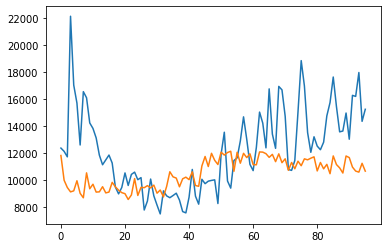

In [103]:
wk = 6
plt.plot(dict_weeks_real[wk])
plt.plot(dict_weeks_fake[wk])